In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:
df

,Output,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.isnull()

,Output,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


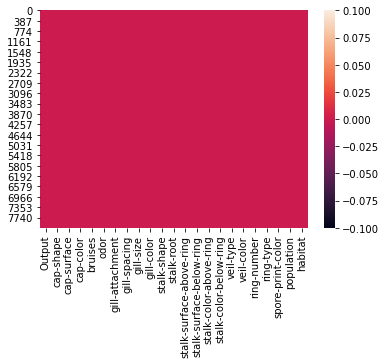

In [5]:
#no null value present
sns.heatmap(df.isnull())

In [6]:
#Need to change all columns with numeric value
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['Output','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [7]:
df

,Output,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


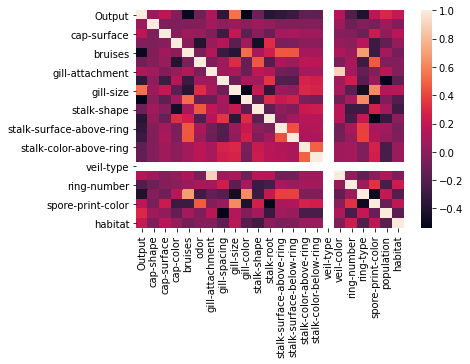

In [8]:
#Bruises,gill-spacing,Gill-color,stalk-root,stalk-color-above-ring,stalk-surface-below-ring',ring-type
#is negatively corelated with Output(can be removed), rest all are neutral corelated
dfcor=df.corr()
sns.heatmap(dfcor)

In [9]:
#outliers
df.describe()

,Output,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Output                          AxesSubplot(0.125,0.71587;0.0945122x0.16413)
cap-shape                    AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
cap-surface                  AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
cap-color                    AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
bruises                      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
odor                         AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
gill-attachment              AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
gill-spacing                   AxesSubplot(0.125,0.518913;0.0945122x0.16413)
gill-size                   AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
gill-color                  AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
stalk-shape                 AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
stalk-root                  AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
stalk-surface-above-ring    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)

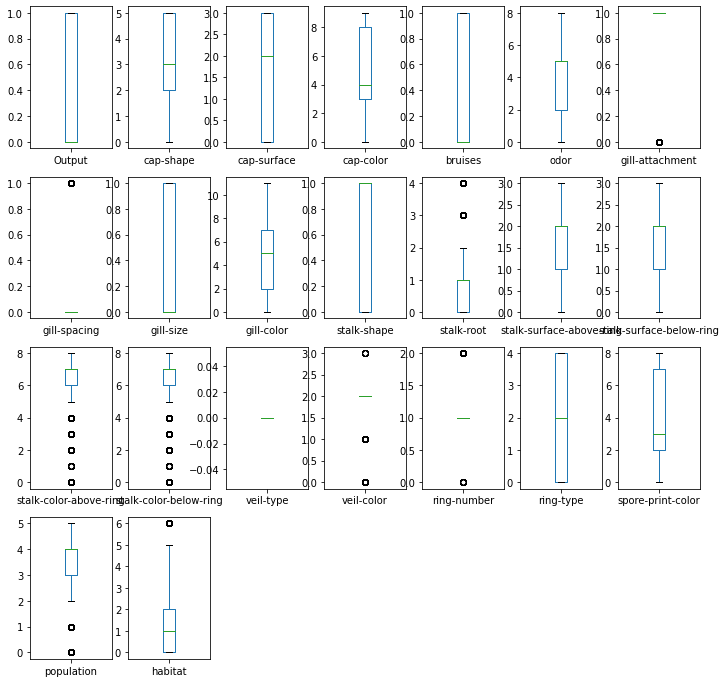

In [10]:
df.plot(kind='box',subplots=True,layout=(4,7),figsize=(12,12))

In [11]:
#no outliers present
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 17,  6, 17], dtype=int64))


,Output,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [12]:
#Skewness-gill-attachment,gill-spacing,stalk-surface-above-ring,veil-color,ring-number,population,stalk-color-above-ring,
#stalk-color-below-ring are highly skewed. rest all moderately skewed
df.skew()

Output                      0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

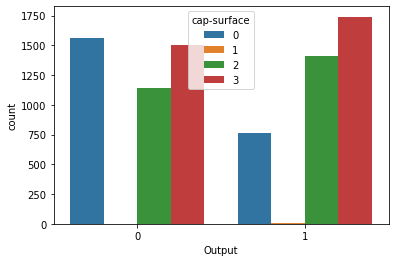

In [13]:
sns.countplot(x='Output',hue='cap-surface',data=df)

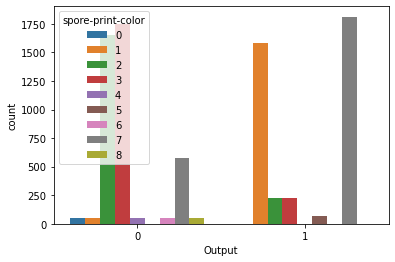

In [14]:
sns.countplot(x='Output',hue='spore-print-color',data=df)

In [15]:
x=df.iloc[ :,1:-1]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,0,2,1,4,2,3
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,0,2,1,4,3,2
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,0,2,1,4,3,2
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,0,2,1,4,2,3
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,0,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,1,4,0,1
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,0,1,4,0,4
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,0,1,1,4,0,1
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,0,2,1,0,7,4


In [16]:
y=df.iloc[ :,-23]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: Output, Length: 8124, dtype: int32

In [17]:
x.shape

(8124, 21)

In [18]:
y.shape

(8124,)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [20]:
x_train.shape

(5443, 21)

In [21]:
x_test.shape

(2681, 21)

In [22]:
y_train.shape

(5443,)

In [23]:
y_test.shape

(2681,)

In [24]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score",accuracy_score(y_test,pred))
print("confusion matrix",confusion_matrix(y_test,pred))
print("classification report",classification_report(y_test,pred))

accuracy score 0.948526669153301
confusion matrix [[1313   65]
 [  73 1230]]
classification report               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1378
           1       0.95      0.94      0.95      1303

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



Accuracy score of Logistic Regression-94.8

In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.64738462 0.98153846 0.87569231 0.99876923 0.73214286]
0.8471054945054945 0.13783769800539386


In [27]:
#roc curve for logistic reggression 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [28]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [29]:
y_pred_prob

array([1.59463329e-06, 9.07367328e-01, 9.99914345e-01, ...,
       3.42961408e-02, 9.96842006e-01, 2.68675904e-02])

In [30]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [31]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [32]:
tpr

array([0.        , 0.00153492, 0.00306984, 0.0038373 , 0.00537222,
       0.00613968, 0.0076746 , 0.00920952, 0.01227936, 0.01458173,
       0.01611665, 0.02148887, 0.02302379, 0.02762855, 0.02916347,
       0.03300077, 0.03607061, 0.03837299, 0.03914045, 0.04067536,
       0.04297774, 0.04681504, 0.04988488, 0.05065234, 0.05218726,
       0.06139678, 0.0629317 , 0.06369916, 0.06676899, 0.07060629,
       0.07214121, 0.07367613, 0.07521105, 0.08135073, 0.08288565,
       0.08518803, 0.08672295, 0.08749041, 0.08902533, 0.09056025,
       0.09209517, 0.09593246, 0.09746738, 0.10437452, 0.10590944,
       0.1066769 , 0.10821182, 0.11665388, 0.11972371, 0.12356101,
       0.12663085, 0.12893323, 0.13046815, 0.13200307, 0.13353799,
       0.13967767, 0.14121259, 0.14198005, 0.14351497, 0.14735226,
       0.14888718, 0.15195702, 0.1542594 , 0.15732924, 0.15886416,
       0.16116654, 0.16270146, 0.16346892, 0.1657713 , 0.17267843,
       0.17421335, 0.17651573, 0.17805065, 0.17881811, 0.18572

In [34]:
threshold

array([1.99996405e+00, 9.99964051e-01, 9.99963712e-01, 9.99962045e-01,
       9.99962035e-01, 9.99960291e-01, 9.99959917e-01, 9.99955296e-01,
       9.99951790e-01, 9.99946233e-01, 9.99943495e-01, 9.99937586e-01,
       9.99936982e-01, 9.99933193e-01, 9.99932546e-01, 9.99929429e-01,
       9.99927553e-01, 9.99927275e-01, 9.99927256e-01, 9.99927174e-01,
       9.99925492e-01, 9.99918871e-01, 9.99914345e-01, 9.99910386e-01,
       9.99906702e-01, 9.99881527e-01, 9.99880412e-01, 9.99878622e-01,
       9.99873674e-01, 9.99834232e-01, 9.99816299e-01, 9.99804761e-01,
       9.99748835e-01, 9.99635716e-01, 9.99604358e-01, 9.99542342e-01,
       9.99540723e-01, 9.99539616e-01, 9.99536663e-01, 9.99523479e-01,
       9.99510825e-01, 9.99462360e-01, 9.99461006e-01, 9.99407783e-01,
       9.99397281e-01, 9.99394336e-01, 9.99378734e-01, 9.99302550e-01,
       9.99262046e-01, 9.99238482e-01, 9.99227966e-01, 9.99214673e-01,
       9.99207457e-01, 9.99197823e-01, 9.99195818e-01, 9.99151723e-01,
      

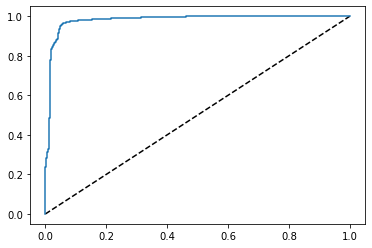

In [35]:
#more area covered 
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LR')

In [36]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [37]:
print(auc_score)

0.9484028149842888
